<center><H1>Evictions Analysis - Final Submission</H1></center>
<center>Capstone Project
<br>Scott Linne
<br>January 2019</center>

 This Notebook takes the square root of the evictions label, then squares it back to return the evictions prediction back to the original scale after using the model.
 
 This is the final notebook for the submission to Challenge 2, resulting in a final R2 value over 0.77 and an EdX grade of 81%

In [2]:
#Load libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data sets
test_values = pd.read_csv('test_values.csv')
train_values = pd.read_csv('train_values_oAriVNN.csv')
train_labels = pd.read_csv('train_labels.csv')

In [4]:
# merge the train labels and train_values to create the consolidated data frame
data = pd.merge(train_labels, train_values, how='inner', on='row_id')

In [5]:
data.shape

(2546, 49)

In [6]:
data.head()

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,681,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,...,1960.0,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112
1,1,0,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,...,890.0,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843
2,2,29,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,...,3509.0,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741
3,3,841,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,...,2219.0,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072
4,4,2,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,...,3410.0,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877


In [7]:
data.dtypes

row_id                                          int64
evictions                                       int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                

In [8]:
# look at the columns available in the training data
data.columns

Index(['row_id', 'evictions', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
       'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_t

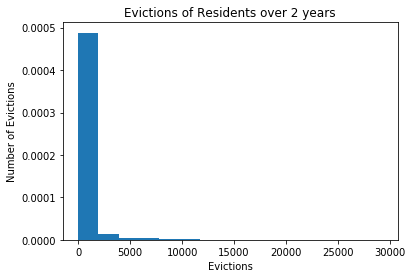

In [9]:
#explore the nature of the target variable, Evictions to understand the distribution of the data
plt.hist(data['evictions'],density=True, bins=15)
plt.title('Evictions of Residents over 2 years')
plt.xlabel('Evictions')
plt.ylabel('Number of Evictions')
plt.savefig('histogram-evictions.png')
plt.show()

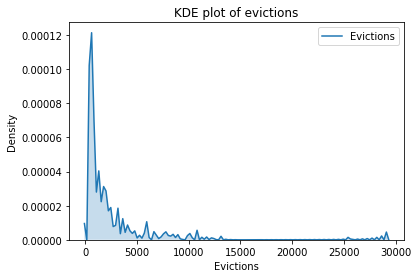

In [10]:
sns.kdeplot(data.evictions, shade=True, label='Evictions');
plt.title('KDE plot of evictions')
plt.xlabel('Evictions')
plt.ylabel('Density')
plt.savefig('kde-plot.png')
plt.show()

## Treat Missing Values and also check for any duplicates

In [11]:
# check for missing values
data.isna().any()

row_id                                        False
evictions                                     False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                        True
median_property_value                          True
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other   

In [12]:
data[data['median_household_income'].isna()]

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
2306,2306,0,95253e1,a,930f257,116.0,14.0,50.677,871.0,NaN,...,NaN,0.467,0.273,0.095,0.198610,0.518371,0.264151,0.018868,9.900990,9.900990
2377,2377,0,95253e1,b,930f257,116.0,14.0,50.971,870.0,NaN,...,NaN,0.461,0.126,0.099,0.196985,0.521608,0.262312,0.019095,21.052632,10.526316


In [13]:
data[data['median_property_value'].isna()]

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
1461,1461,0,375421b,b,930f257,563.0,95.0,67.695,558.0,36438.0,...,NaN,0.485,0.253,0.147,0.322645,0.333667,0.192385,0.151303,9.523810,7.142857
1816,1816,0,375421b,a,930f257,570.0,96.0,67.239,558.0,36438.0,...,NaN,0.496,0.219,0.162,0.322000,0.336000,0.192000,0.150000,7.263923,0.000000


In [14]:
 # fill na values for household income with the mean
data['median_household_income'].fillna(data['median_household_income'].mean(), inplace=True)

In [15]:
# fill na values for property value with the mean
data['median_property_value'].fillna(data['median_property_value'].mean(), inplace=True)

In [16]:
data.isna().any()

row_id                                        False
evictions                                     False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other   

In [17]:
# drop columns with nas. There are too many missing values in these columns to make them useful
data.drop(['pct_adult_smoking','pct_low_birthweight', 'pct_excessive_drinking', 'air_pollution_particulate_matter_value','homicides_per_100k','motor_vehicle_crash_deaths_per_100k','pop_per_dentist','pop_per_primary_care_physician'], axis=1, inplace=True)

In [18]:
# ensure that all missing values have been removed. Machine learning algorithms cannot process missing data
data.isna().any()

row_id                                        False
evictions                                     False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other   

In [19]:
# check data types and determine if we have any categorical variables that will need to be converted to dummies
data.dtypes

row_id                                          int64
evictions                                       int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                

<b>RUCC, Urban Influence, and econimic typology</b> are categorical variables. 
These may be valuable as they indicate economic conditions these may be converted and set with dummy variables

In [20]:
data.head()

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,heart_disease_mortality_per_100k,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,681,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,...,318,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112
1,1,0,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,...,306,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843
2,2,29,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,...,266,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741
3,3,841,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,...,325,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072
4,4,2,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,...,187,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877


In [21]:
# to help scale the target variable evictions use a square root, which we later take the inverse by squaring the final
# target values. This is necessary because the target is heavily skewed right with many large values. this helps bring the 
# target variable on a similar scale as the predictor variables
data['evictionsSqrt'] = np.floor(np.sqrt(data['evictions']))

In [22]:
data.head()

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictionsSqrt
0,0,681,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,26.0
1,1,0,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0.0
2,2,29,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,5.0
3,3,841,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,29.0
4,4,2,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,1.0


In [23]:
data[['evictions', 'evictionsSqrt']].head(30)

,evictions,evictionsSqrt
0,681,26.0
1,0,0.0
2,29,5.0
3,841,29.0
4,2,1.0
5,4191,64.0
6,24,4.0
7,225,15.0
8,93,9.0
9,6,2.0


In [24]:
data['evictionsSqrt'].head()  # this is the one we want to send through the algorithm

0    26.0
1     0.0
2     5.0
3    29.0
4     1.0
Name: evictionsSqrt, dtype: float64

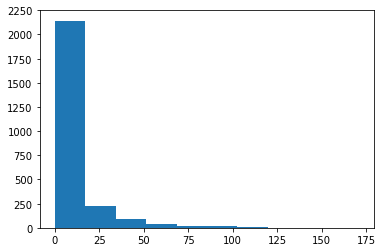

In [25]:
plt.hist(data['evictionsSqrt'])
plt.show()

In [26]:
data.dtypes

row_id                                          int64
evictions                                       int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                

# Data Exploration

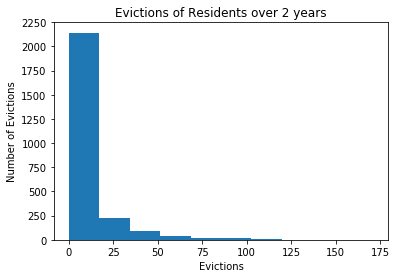

In [27]:
plt.hist(data['evictionsSqrt'])
plt.title('Evictions of Residents over 2 years')
plt.xlabel('Evictions')
plt.ylabel('Number of Evictions')
plt.show()

The data indicates the number of evictions by county is heavily skewed to the right. There are many outliers in the data. This variable will need to be adjusted in order to be useful in a machine learning algorithm

Check for correlations within the features to identify if any variables change relative to the number of evictions.

In [28]:
correlationGrid = data[['evictions', 'population', 'renter_occupied_households', 'median_household_income','median_gross_rent', 
        'median_property_value', 'rent_burden', 'pct_renter_occupied','pct_white', 'pct_af_am', 'pct_hispanic', 
        'pct_am_ind', 'pct_asian', 'pct_multiple', 'poverty_rate','pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children', 'pct_female', 'pct_adults_less_than_a_high_school_diploma','pct_adults_with_high_school_diploma']].corr().style.background_gradient()

In [29]:
correlationGrid

,evictions,population,renter_occupied_households,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_female,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma
evictions,1,0.808024,0.806802,0.13149,0.301743,0.174026,0.155838,0.368408,-0.278551,0.195535,0.142145,-0.0380941,0.321428,0.0684324,0.0259372,-0.0200832,0.0574762,-0.034523,0.131132,-0.0406337,-0.299438
population,0.808024,1,0.974264,0.262047,0.449865,0.36291,0.180068,0.353268,-0.280231,0.105124,0.205647,-0.0424187,0.510165,0.0626958,-0.0329097,-0.0257856,0.0154079,-0.0654384,0.122986,-0.0568568,-0.351491
renter_occupied_households,0.806802,0.974264,1,0.205564,0.410921,0.360387,0.168291,0.404281,-0.284968,0.12337,0.195405,-0.0393243,0.496126,0.0595903,-0.000166821,-0.0202375,0.0300397,-0.0572124,0.116302,-0.0352488,-0.331082
median_household_income,0.13149,0.262047,0.205564,1,0.735655,0.680527,-0.190264,-0.0501679,0.111025,-0.251263,0.045219,-0.108566,0.472496,0.0805218,-0.725208,-0.487066,-0.485359,-0.16543,0.0561599,-0.558119,-0.448223
median_gross_rent,0.301743,0.449865,0.410921,0.735655,1,0.827344,0.233079,0.295288,-0.212088,0.0535008,0.144988,-0.0904367,0.630138,0.156573,-0.371338,-0.182527,-0.216448,-0.127244,0.085231,-0.328307,-0.579815
median_property_value,0.174026,0.36291,0.360387,0.680527,0.827344,1,0.164375,0.229072,-0.0322366,-0.0728237,0.0162762,-0.0581712,0.609864,0.113321,-0.39118,-0.168627,-0.297491,-0.163542,0.0858291,-0.390758,-0.532652
rent_burden,0.155838,0.180068,0.168291,-0.190264,0.233079,0.164375,1,0.19952,-0.182015,0.328064,-0.077212,-0.0864053,0.143989,0.033479,0.354528,0.426929,0.0218087,-0.265705,0.149373,0.122764,-0.131191
pct_renter_occupied,0.368408,0.353268,0.404281,-0.0501679,0.295288,0.229072,0.19952,1,-0.463292,0.2789,0.260115,0.0436331,0.397631,0.178057,0.258397,0.0261985,0.167806,0.0117749,0.0839477,0.101773,-0.380991
pct_white,-0.278551,-0.280231,-0.284968,0.111025,-0.212088,-0.0322366,-0.182015,-0.463292,1,-0.627887,-0.639573,-0.209029,-0.270286,-0.0592216,-0.468282,-0.235029,-0.53415,-0.303454,0.0709771,-0.519963,0.356022
pct_af_am,0.195535,0.105124,0.12337,-0.251263,0.0535008,-0.0728237,0.328064,0.2789,-0.627887,1,-0.106942,-0.067804,0.0393218,-0.0942101,0.488977,0.406994,0.214211,-0.0771866,0.0619403,0.345525,-0.0873036


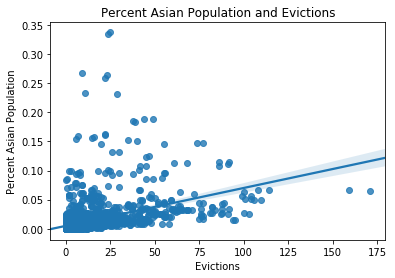

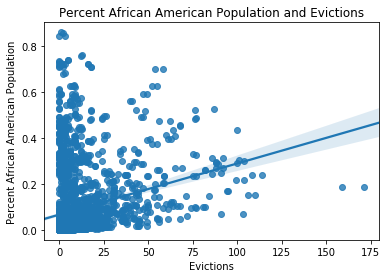

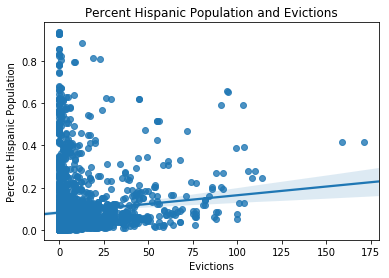

In [30]:
sns.regplot(data['evictionsSqrt'], data['pct_asian'])
plt.xlabel('Evictions')
plt.ylabel('Percent Asian Population')
plt.title('Percent Asian Population and Evictions')
plt.show()

sns.regplot(data['evictionsSqrt'], data['pct_af_am'])
plt.xlabel('Evictions')
plt.ylabel('Percent African American Population')
plt.title('Percent African American Population and Evictions')
plt.show()
sns.regplot(data['evictionsSqrt'], data['pct_hispanic'])
plt.xlabel('Evictions')
plt.ylabel('Percent Hispanic Population')
plt.title('Percent Hispanic Population and Evictions')
plt.show()

Text(0.5,1,'Rent Burden and Evictions')

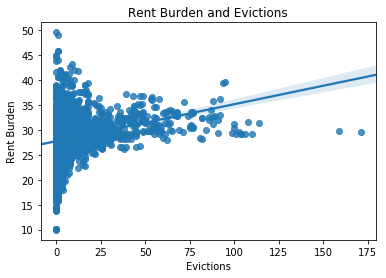

In [31]:
sns.regplot(data.evictionsSqrt, data.rent_burden)
plt.xlabel('Evictions')
plt.ylabel('Rent Burden')
plt.title('Rent Burden and Evictions')

In [32]:
data.columns

Index(['row_id', 'evictions', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_diabetes', 'pct_physical_inactivity',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictionsSqrt'],
      dtype='object')

In [33]:
# store variables relevant with evictions - using domain knowledge around evictions literature
predictors= ['population','median_household_income','median_gross_rent', 'median_property_value', 'rent_burden', 'pct_white', 'pct_af_am', 'pct_asian', 'pct_multiple', 'poverty_rate','pct_unemployment','pct_female', 'pct_uninsured_children','pct_adults_with_high_school_diploma','pct_adults_less_than_a_high_school_diploma']

In [34]:
# store features into new features dataframe
features = data[predictors]

In [35]:
print(features.shape)

(2546, 15)


In [36]:
features.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma
0,45009.0,33315.0,643.0,98494.0,33.389,0.412070,0.493459,0.004575,0.015921,18.451,0.093,0.532,0.068,0.375000,0.233000
1,9872.0,43724.0,517.0,85444.0,26.477,0.838682,0.015588,0.005771,0.028245,11.922,0.040,0.509,0.092,0.397590,0.073293
2,17625.0,37777.0,671.0,136162.0,32.500,0.873733,0.041040,0.004873,0.028728,11.883,0.065,0.451,0.108,0.303393,0.206587
3,134136.0,30607.0,603.0,70062.0,31.959,0.264083,0.240836,0.007244,0.025582,26.025,0.084,0.519,0.101,0.334995,0.248255
4,6936.0,44237.0,668.0,187066.0,29.339,0.924502,0.005146,0.000707,0.016672,10.674,0.064,0.487,0.119,0.276342,0.058648


In [37]:
# store predictor features into X and dependent variable 'eviction' into y
X = features
y = data[['evictionsSqrt']]

In [38]:
X.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma
0,45009.0,33315.0,643.0,98494.0,33.389,0.412070,0.493459,0.004575,0.015921,18.451,0.093,0.532,0.068,0.375000,0.233000
1,9872.0,43724.0,517.0,85444.0,26.477,0.838682,0.015588,0.005771,0.028245,11.922,0.040,0.509,0.092,0.397590,0.073293
2,17625.0,37777.0,671.0,136162.0,32.500,0.873733,0.041040,0.004873,0.028728,11.883,0.065,0.451,0.108,0.303393,0.206587
3,134136.0,30607.0,603.0,70062.0,31.959,0.264083,0.240836,0.007244,0.025582,26.025,0.084,0.519,0.101,0.334995,0.248255
4,6936.0,44237.0,668.0,187066.0,29.339,0.924502,0.005146,0.000707,0.016672,10.674,0.064,0.487,0.119,0.276342,0.058648


In [39]:
y.head()

,evictionsSqrt
0,26.0
1,0.0
2,5.0
3,29.0
4,1.0


In [40]:
# split the data set into training and test sets for use in regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1909, 15)
(637, 15)
(1909, 1)
(637, 1)


## Scale numerical variables

In [42]:
#use Scikit Learn StandardScaler to scale the continuous variables, using Z score methodology, 
#center mean around 0 and 1 std deviation. This is necessary because the predictor variables are many different units of scale
scaler = StandardScaler()

In [43]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
X_train = scaler.transform(X_train)

In [45]:
X_test = scaler.transform(X_test)

In [46]:
y_train = np.array(y_train)

In [47]:
y_test = np.array(y_test)

## Start Random Forest Regressor Here

In [48]:
# Store the random forest regressor into a variable for use
regr = RandomForestRegressor()

In [49]:
X_train.shape

(1909, 15)

In [50]:
y_train.shape

(1909, 1)

In [51]:
X_test.shape

(637, 15)

In [52]:
y_test.shape

(637, 1)

In [53]:
y_train = np.ravel(y_train)

In [54]:
# fit the Random Forest Regressor to the training data
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
# predict the target variable using the test values that were held out from the Train Test Split procedure
predict = regr.predict(X_test)

In [56]:
X_test.shape

(637, 15)

In [57]:
predict.shape

(637,)

In [58]:
pd.DataFrame(predict).head()

,0
0,1.0
1,1.3
2,2.9
3,3.3
4,78.8


# Evaluate Model Performance

In [59]:
r2 = r2_score(y_true=y_test, y_pred=predict)
print(r2)

0.9059811309588619


In [60]:
RMSE = math.sqrt(mean_squared_error(y_true = y_test, y_pred = predict))

print(RMSE)

4.823316276775604


In [61]:
predict.shape

(637,)

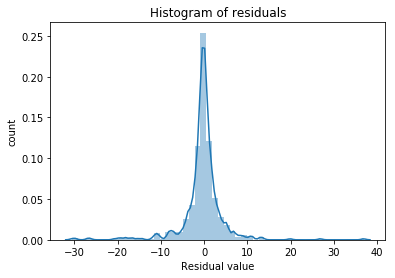

In [62]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, predict) 

In [63]:
import scipy.stats as ss

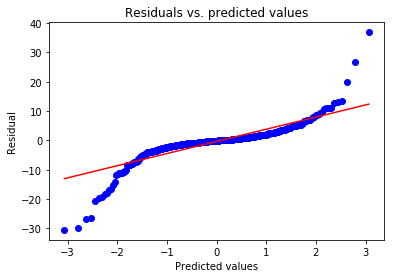

In [64]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, predict) 

In [65]:
# Rescale the Y labels
predict = np.square(predict)

In [66]:
#verify values are accurate
predict[:10]

array([1.00000e+00, 1.69000e+00, 8.41000e+00, 1.08900e+01, 6.20944e+03,
       7.74400e+01, 7.29000e+00, 1.79560e+02, 7.92100e+01, 5.76000e+00])

In [67]:
pd.Series(np.floor(predict))

0         1.0
1         1.0
2         8.0
3        10.0
4      6209.0
5        77.0
6         7.0
7       179.0
8        79.0
9         5.0
10      110.0
11        7.0
12      364.0
13        3.0
14        1.0
15       17.0
16        0.0
17       22.0
18        3.0
19      501.0
20     1831.0
21       38.0
22        8.0
23       19.0
24       18.0
25       12.0
26       23.0
27        0.0
28        1.0
29       36.0
        ...  
607       0.0
608       0.0
609    2016.0
610     161.0
611       0.0
612      57.0
613      42.0
614      27.0
615      96.0
616       9.0
617     190.0
618       8.0
619       1.0
620     734.0
621     259.0
622      18.0
623     237.0
624      54.0
625      36.0
626       4.0
627       0.0
628       9.0
629       4.0
630       0.0
631      29.0
632      14.0
633      11.0
634       0.0
635      40.0
636      79.0
Length: 637, dtype: float64

# Load Test Data

In [68]:
test_values.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,a110aae,a,37520b7,171046.0,17342.0,25.310,672.0,42828.0,99353.0,...,1399.0,0.509,0.239,0.149,0.112450,0.346386,0.357430,0.183735,12.238462,9.983245
1,1,daa811a,b,3c7c507,114518.0,13776.0,29.492,657.0,53712.0,149404.0,...,1790.0,0.497,0.234,0.154,0.089357,0.366466,0.311245,0.232932,10.213609,8.902167
2,2,04b5074,a,3c7c507,4452.0,317.0,13.208,506.0,48642.0,140740.0,...,1490.0,0.481,0.161,0.247,0.088176,0.395792,0.345691,0.170341,4.697987,10.514541
3,3,261a880,b,be99678,16883.0,1703.0,29.757,786.0,40827.0,139862.0,...,1510.0,0.501,0.236,0.200,0.130261,0.379760,0.330661,0.159319,11.168180,12.601529
4,4,3f91d56,b,26926ff,71393.0,7974.0,30.864,650.0,44688.0,103120.0,...,2419.0,0.526,0.246,0.150,0.129611,0.354935,0.334995,0.180459,12.941045,11.066342


In [69]:
# check for missing values
test_values.isna().any()

row_id                                        False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                              True
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate

In [70]:
test_values[test_values['median_gross_rent'].isna()]

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
514,514,c09169c,b,0df5b61,3930.0,318.0,12.459,NaN,64832.0,176658.0,...,NaN,0.492,0.146,0.231,0.075547,0.295229,0.416501,0.212724,5.659892,7.718034
1977,1977,c09169c,a,0df5b61,3919.0,325.0,12.599,NaN,64832.0,175546.0,...,NaN,0.481,0.146,0.253,0.075848,0.292415,0.417166,0.214571,3.051494,3.305785


In [71]:
 # fill na values for household income with the mean
test_values['median_gross_rent'].fillna(test_values['median_gross_rent'].mean(), inplace=True)

In [72]:
# check for missing values
test_values.isna().any()

row_id                                        False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate

In [73]:
# drop columns with nas. There are too many missing values in these columns to make them useful
test_values.drop(['pct_adult_smoking','pct_low_birthweight', 'pct_excessive_drinking', 'air_pollution_particulate_matter_value','homicides_per_100k','motor_vehicle_crash_deaths_per_100k','pop_per_dentist','pop_per_primary_care_physician'], axis=1, inplace=True)

In [74]:
# check for missing values
test_values.isna().any()

row_id                                        False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate

In [75]:
#store features into new features dataframe
features = test_values[predictors]

In [76]:
features.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma
0,171046.0,42828.0,672.0,99353.0,34.738,0.768640,0.136740,0.005135,0.031390,14.572,0.058,0.509,0.039,0.346386,0.112450
1,114518.0,53712.0,657.0,149404.0,25.108,0.859299,0.014054,0.050631,0.014494,6.752,0.046,0.497,0.045,0.366466,0.089357
2,4452.0,48642.0,506.0,140740.0,25.072,0.976854,0.002000,0.000700,0.003429,5.269,0.068,0.481,0.067,0.395792,0.088176
3,16883.0,40827.0,786.0,139862.0,30.767,0.883453,0.000000,0.007568,0.016125,11.349,0.060,0.501,0.122,0.379760,0.130261
4,71393.0,44688.0,650.0,103120.0,27.092,0.732230,0.028232,0.006210,0.052701,13.211,0.047,0.526,0.116,0.354935,0.129611


In [77]:
X = features

In [78]:
X.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma
0,171046.0,42828.0,672.0,99353.0,34.738,0.768640,0.136740,0.005135,0.031390,14.572,0.058,0.509,0.039,0.346386,0.112450
1,114518.0,53712.0,657.0,149404.0,25.108,0.859299,0.014054,0.050631,0.014494,6.752,0.046,0.497,0.045,0.366466,0.089357
2,4452.0,48642.0,506.0,140740.0,25.072,0.976854,0.002000,0.000700,0.003429,5.269,0.068,0.481,0.067,0.395792,0.088176
3,16883.0,40827.0,786.0,139862.0,30.767,0.883453,0.000000,0.007568,0.016125,11.349,0.060,0.501,0.122,0.379760,0.130261
4,71393.0,44688.0,650.0,103120.0,27.092,0.732230,0.028232,0.006210,0.052701,13.211,0.047,0.526,0.116,0.354935,0.129611


In [79]:
X.shape

(2420, 15)

In [80]:
X = np.array(X)

In [81]:
X

array([[1.71046000e+05, 4.28280000e+04, 6.72000000e+02, ...,
        3.90000000e-02, 3.46385542e-01, 1.12449799e-01],
       [1.14518000e+05, 5.37120000e+04, 6.57000000e+02, ...,
        4.50000000e-02, 3.66465863e-01, 8.93574297e-02],
       [4.45200000e+03, 4.86420000e+04, 5.06000000e+02, ...,
        6.70000000e-02, 3.95791583e-01, 8.81763527e-02],
       ...,
       [7.26500000e+04, 3.60310000e+04, 7.73000000e+02, ...,
        1.20000000e-01, 2.80000000e-01, 1.32000000e-01],
       [7.59640000e+04, 4.28790000e+04, 6.85000000e+02, ...,
        4.80000000e-02, 3.38000000e-01, 1.48000000e-01],
       [5.93120000e+04, 3.38710000e+04, 6.67000000e+02, ...,
        3.90000000e-02, 2.52758275e-01, 8.32497492e-02]])

In [82]:
X = scaler.transform(X)

In [83]:
y = regr.predict(X)

In [84]:
y

array([30.9, 16.7,  0.5, ..., 14.4, 12.5, 14.5])

In [85]:
y.shape

(2420,)

In [86]:
type(y)

numpy.ndarray

In [87]:
prediction = np.square(y)

In [88]:
prediction[:10]

array([9.54810e+02, 2.78890e+02, 2.50000e-01, 9.61000e+00, 1.44000e+02,
       3.80250e+02, 2.56000e+00, 6.88900e+01, 1.91844e+03, 4.48900e+01])

In [89]:
prediction = pd.Series(np.floor(prediction))

In [90]:
# output predictions to csv for uploading submission for grade
#prediction.to_csv('myLogEvicPredictionSqrt.csv')

In [91]:
prediction[:5]

0    954.0
1    278.0
2      0.0
3      9.0
4    144.0
dtype: float64

In [92]:
data.economic_typology.value_counts()

Nonspecialized                        1024
Manufacturing-dependent                410
Farm-dependent                         360
Federal/State government-dependent     290
Recreation                             248
Mining-dependent                       214
Name: economic_typology, dtype: int64

In [93]:
#back up exploration
mydata = data.copy()

In [94]:
mydata.shape

(2546, 42)

In [95]:
mydata.columns

Index(['row_id', 'evictions', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_diabetes', 'pct_physical_inactivity',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictionsSqrt'],
      dtype='object')

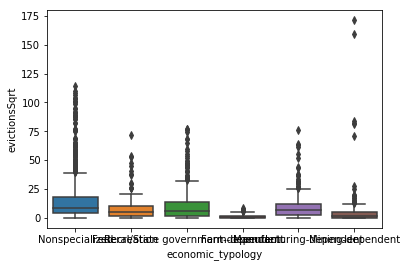

In [96]:
sns.boxplot('economic_typology', 'evictionsSqrt', data=mydata)
plt.show()

Take the categorical variable for economic typology and convert this to a dummy variable for use in the predictors

In [97]:
data.rucc.value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         466
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    370
Metro - Counties in metro areas of 1 million population or more                                  358
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     337
Metro - Counties in metro areas of 250,000 to 1 million population                               289
Metro - Counties in metro areas of fewer than 250,000 population                                 261
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        210
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          170
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                       85
Name: rucc, dtype: int64

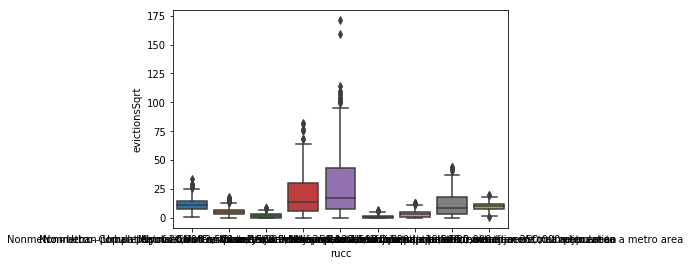

In [98]:
sns.boxplot(x='rucc', y='evictionsSqrt', data=mydata)

In [99]:
mydata.head()

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictionsSqrt
0,0,681,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,26.0
1,1,0,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0.0
2,2,29,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,5.0
3,3,841,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,29.0
4,4,2,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,1.0


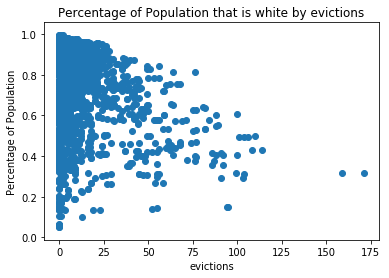

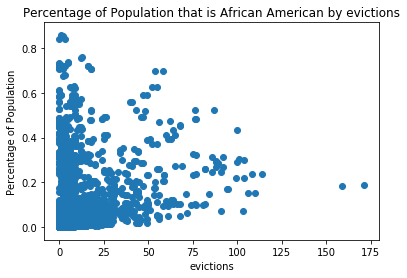

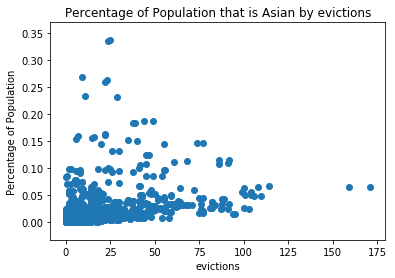

In [100]:
plt.scatter(data['evictionsSqrt'], data['pct_white'])
plt.xlabel('evictions')
plt.ylabel('Percentage of Population')
plt.title('Percentage of Population that is white by evictions')
plt.savefig('pctWhiteEvictions.png')
plt.show()


plt.scatter(data['evictionsSqrt'], data['pct_af_am'])
plt.xlabel('evictions')
plt.ylabel('Percentage of Population')
plt.title('Percentage of Population that is African American by evictions')
plt.show()

plt.scatter(data['evictionsSqrt'], data['pct_asian'])
plt.xlabel('evictions')
plt.ylabel('Percentage of Population')
plt.title('Percentage of Population that is Asian by evictions')
plt.show()


In [101]:
data = pd.get_dummies(data, columns=['economic_typology'], drop_first=True)

In [102]:
data.head()

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictionsSqrt,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation
0,0,681,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,...,0.278000,0.114000,12.915129,11.205112,26.0,0,0,0,1,0
1,1,0,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,...,0.331325,0.197791,11.049159,12.276843,0.0,0,0,0,1,0
2,2,29,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,...,0.301397,0.188623,7.903576,10.161741,5.0,0,0,0,0,1
3,3,841,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,...,0.290130,0.126620,13.137119,10.202072,29.0,0,0,0,1,0
4,4,2,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,...,0.413519,0.251491,6.084752,5.939877,1.0,1,0,0,0,0


In [103]:
# store variables relevant with evictions - using domain knowledge around evictions literature
predictordummy= ['population','median_household_income','median_gross_rent', 'median_property_value', 'rent_burden', 'pct_white', 'pct_af_am', 'pct_asian', 'pct_multiple', 'poverty_rate','pct_unemployment','pct_female', 'pct_uninsured_children','pct_adults_with_high_school_diploma','pct_adults_less_than_a_high_school_diploma','economic_typology_Federal/State government-dependent','economic_typology_Manufacturing-dependent','economic_typology_Mining-dependent','economic_typology_Nonspecialized','economic_typology_Recreation']

# Dummy variables

In [104]:
# store features into new features dataframe
features = data[predictordummy]

print(features.shape)

(2546, 20)


In [105]:
features.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation
0,45009.0,33315.0,643.0,98494.0,33.389,0.412070,0.493459,0.004575,0.015921,18.451,0.093,0.532,0.068,0.375000,0.233000,0,0,0,1,0
1,9872.0,43724.0,517.0,85444.0,26.477,0.838682,0.015588,0.005771,0.028245,11.922,0.040,0.509,0.092,0.397590,0.073293,0,0,0,1,0
2,17625.0,37777.0,671.0,136162.0,32.500,0.873733,0.041040,0.004873,0.028728,11.883,0.065,0.451,0.108,0.303393,0.206587,0,0,0,0,1
3,134136.0,30607.0,603.0,70062.0,31.959,0.264083,0.240836,0.007244,0.025582,26.025,0.084,0.519,0.101,0.334995,0.248255,0,0,0,1,0
4,6936.0,44237.0,668.0,187066.0,29.339,0.924502,0.005146,0.000707,0.016672,10.674,0.064,0.487,0.119,0.276342,0.058648,1,0,0,0,0


In [106]:
# store predictor features into X and dependent variable 'eviction' into y
X = features
y = data[['evictionsSqrt']]

In [107]:
X.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation
0,45009.0,33315.0,643.0,98494.0,33.389,0.412070,0.493459,0.004575,0.015921,18.451,0.093,0.532,0.068,0.375000,0.233000,0,0,0,1,0
1,9872.0,43724.0,517.0,85444.0,26.477,0.838682,0.015588,0.005771,0.028245,11.922,0.040,0.509,0.092,0.397590,0.073293,0,0,0,1,0
2,17625.0,37777.0,671.0,136162.0,32.500,0.873733,0.041040,0.004873,0.028728,11.883,0.065,0.451,0.108,0.303393,0.206587,0,0,0,0,1
3,134136.0,30607.0,603.0,70062.0,31.959,0.264083,0.240836,0.007244,0.025582,26.025,0.084,0.519,0.101,0.334995,0.248255,0,0,0,1,0
4,6936.0,44237.0,668.0,187066.0,29.339,0.924502,0.005146,0.000707,0.016672,10.674,0.064,0.487,0.119,0.276342,0.058648,1,0,0,0,0


In [108]:
# split the data set into training and test sets for use in regression
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25)

In [109]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1909, 20)
(637, 20)
(1909, 1)
(637, 1)


In [110]:
X.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation
0,45009.0,33315.0,643.0,98494.0,33.389,0.412070,0.493459,0.004575,0.015921,18.451,0.093,0.532,0.068,0.375000,0.233000,0,0,0,1,0
1,9872.0,43724.0,517.0,85444.0,26.477,0.838682,0.015588,0.005771,0.028245,11.922,0.040,0.509,0.092,0.397590,0.073293,0,0,0,1,0
2,17625.0,37777.0,671.0,136162.0,32.500,0.873733,0.041040,0.004873,0.028728,11.883,0.065,0.451,0.108,0.303393,0.206587,0,0,0,0,1
3,134136.0,30607.0,603.0,70062.0,31.959,0.264083,0.240836,0.007244,0.025582,26.025,0.084,0.519,0.101,0.334995,0.248255,0,0,0,1,0
4,6936.0,44237.0,668.0,187066.0,29.339,0.924502,0.005146,0.000707,0.016672,10.674,0.064,0.487,0.119,0.276342,0.058648,1,0,0,0,0


In [111]:
X_train2 = np.array(X_train2)
X_test2 = np.array(X_test2)

In [112]:
X_train2.shape

(1909, 20)

In [113]:
type(X_train2)

numpy.ndarray

In [114]:
X_train2[:5,:15]

array([[2.40180000e+04, 4.89170000e+04, 7.00000000e+02, 1.22315000e+05,
        3.17500000e+01, 9.49398823e-01, 3.53987625e-03, 6.29757022e-03,
        1.75690176e-02, 8.72700000e+00, 6.10000000e-02, 5.09000000e-01,
        4.70000000e-02, 3.69000000e-01, 8.10000000e-02],
       [4.45070000e+04, 3.33160000e+04, 6.43000000e+02, 9.84610000e+04,
        3.36130000e+01, 4.12087036e-01, 4.93733312e-01, 4.54309967e-03,
        1.59207747e-02, 1.87060000e+01, 8.50000000e-02, 5.32000000e-01,
        7.70000000e-02, 3.77490040e-01, 2.31075697e-01],
       [1.11310000e+04, 5.23740000e+04, 7.15000000e+02, 2.43239000e+05,
        2.88170000e+01, 8.82740289e-01, 8.52816207e-03, 9.92770696e-03,
        1.55460239e-02, 9.59800000e+00, 7.50000000e-02, 4.97000000e-01,
        6.90000000e-02, 2.93120638e-01, 9.27218345e-02],
       [1.63940000e+04, 3.78480000e+04, 5.45000000e+02, 9.61160000e+04,
        2.79350000e+01, 9.67599250e-01, 5.31582549e-03, 2.56865448e-03,
        1.27837669e-02, 1.42850000e+0

In [115]:
#use Scikit Learn StandardScaler to scale the continuous variables, using Z score methodology, 
#center mean around 0 and 1 std deviation. This is necessary because the predictor variables are many different units of scale
scaler = StandardScaler()

In [116]:
scaler.fit(X_train2[:,:15])
X_train2[:,:15] = scaler.transform(X_train2[:,:15])
X_test2[:,:15] = scaler.transform(X_test2[:,:15])
y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)
X_train2[:5,:]

array([[-0.25997781,  0.24295506,  0.04136199, -0.10584152,  0.71787679,
         0.86945267, -0.60122481, -0.22394836, -0.0189395 , -0.66281225,
         0.05923151,  0.41080652, -0.95763174,  0.24565954, -0.9915743 ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.20051877, -1.0911592 , -0.2629465 , -0.40961799,  1.13695407,
        -1.78063773,  2.75494842, -0.29223757, -0.12029282,  1.10148253,
         1.19326862,  1.39645033, -0.22273908,  0.36755127,  1.23541381,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.29737586,  0.53857925,  0.12144318,  1.43410421,  0.05810564,
         0.54068426, -0.56707186, -0.08265266, -0.1433369 , -0.50881878,
         0.72075315, -0.10344243, -0.41871045, -0.84374247, -0.81763284,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.28210265, -0.70360675, -0.78614357, -0.43948115, -0.1402981 ,
         0.9592195 , -0.58906554, -0.36908884, -

In [117]:
# Store the random forest regressor into a variable for use
regr = RandomForestRegressor()

X_train2.shape

y_train2.shape

X_test2.shape

y_test2.shape

y_train2 = np.ravel(y_train2)

# fit the Random Forest Regressor to the training data
regr.fit(X_train2, y_train2)

#print(regr.feature_importances_)

# predict the target variable using the test values that were held out from the Train Test Split procedure
predict2 = regr.predict(X_test2)

X_test2.shape

predict2.shape

pd.DataFrame(predict2).head()

,0
0,19.1
1,2.5
2,1.0
3,11.2
4,1.0


In [118]:
r2 = r2_score(y_true=y_test2, y_pred=predict2)
print(r2)

RMSE = math.sqrt(mean_squared_error(y_true = y_test2, y_pred = predict2))

print(RMSE)

predict.shape

0.9278510604428367
3.8231879486956704


(637,)

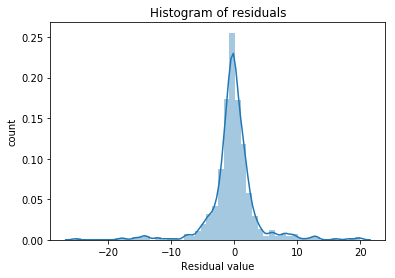

In [119]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test2, predict2) 

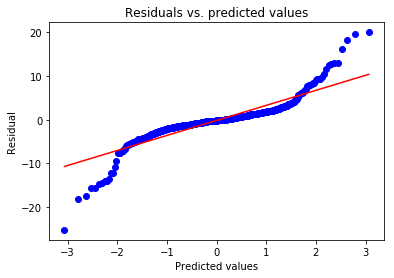

In [120]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test2, predict2) 

In [121]:
# Rescale the Y labels
predict2 = np.square(predict2)

#verify values are accurate
predict2[:10]

pd.Series(np.floor(predict2))

0        364.0
1          6.0
2          1.0
3        125.0
4          1.0
5        404.0
6       1004.0
7        176.0
8          1.0
9         47.0
10         1.0
11        22.0
12         3.0
13        13.0
14       174.0
15         2.0
16        39.0
17         0.0
18         0.0
19      6021.0
20         9.0
21         0.0
22        17.0
23         6.0
24      3856.0
25        53.0
26        19.0
27        84.0
28         4.0
29        81.0
        ...   
607       98.0
608       16.0
609        4.0
610        1.0
611       23.0
612        4.0
613      506.0
614       59.0
615       32.0
616      292.0
617        9.0
618        0.0
619       13.0
620      151.0
621    12365.0
622       10.0
623        4.0
624     1383.0
625        0.0
626        3.0
627       53.0
628      219.0
629      533.0
630       23.0
631        8.0
632      645.0
633       15.0
634      272.0
635       86.0
636       98.0
Length: 637, dtype: float64